In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import r2_score

%matplotlib inline

In [13]:
car_df = pd.read_csv('car_data.csv')

In [14]:
car_df.head()

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


# Tasks, Part 1

### 1.) Find the linear regression equation for mileage vs price.
### 2.)Chart the original data and the equation on the chart.
### 3.)Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [68]:
car_data = LinearRegression()

In [69]:
car_data.fit(car_df[['Mileage']], car_df[['Price']])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

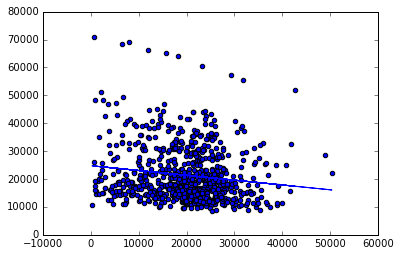

In [70]:
plt.scatter(car_df[['Mileage']], car_df[['Price']])
plt.plot(car_df[['Mileage']], car_data.predict(car_df[['Mileage']]))

In [71]:
car_data.score(car_df[['Mileage']], car_df[['Price']])

0.020463447323489481

# Tasks, Part 2
### 1.) Use mileage, cylinders, liters, doors, cruise, sound, and leather to find the linear regression equation.
### 2.) Find the equation's R2 score (use the .score method) to determine whether the equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
### 3.) Find the combination of the factors that is the best predictor for price.


In [141]:
multi_data = LinearRegression()

In [142]:
inputs = car_df[['Mileage', 'Cylinder', 'Doors', 'Cruise', 'Sound', 'Leather']]
outputs = car_df['Price']

In [143]:
multi_data.fit(inputs, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

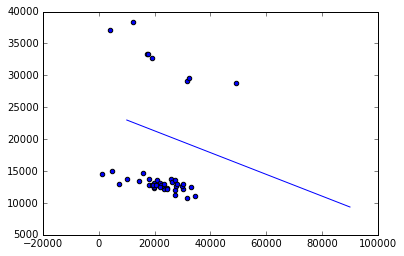

In [138]:
predicted_prices = []
mileages = [i * 10000 for i in range(1, 10)]
for mileage in mileages:
    
     predicted_prices.append(multi_data.predict([[mileage, 4, 2, 1, 1, 1]]))
        
relevant_car = (car_df.Cylinder == 4) & (car_df.Doors == 2) & (car_df.Cruise == 1) & (car_df.Sound == 1)  & (car_df.Leather == 1)
plt.scatter(car_df[relevant_car]['Mileage'], car_df[relevant_car]['Price'])
plt.plot(mileages, predicted_prices)

In [148]:
multi_data.score(inputs, car_df[['Price']])

0.4456909210587025

In [162]:
best_price_data = LinearRegression()

In [163]:
inputs_1 = car_df[['Mileage']]

In [164]:
best_price_data.fit(inputs_1, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
best_price_data.score(inputs_1, car_df[['Price']])

0.020463447323489481

In [168]:
inputs_2 = car_df[['Cylinder']]

In [169]:
best_price_data.fit(inputs_2, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [170]:
best_price_data.score(inputs_2, car_df[['Price']])

0.32385903759512258

In [171]:
inputs_3 = car_df[['Doors']]

In [172]:
best_price_data.fit(inputs_3, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [173]:
best_price_data.score(inputs_3, car_df[['Price']])

0.019251466591467259

In [174]:
inputs_4 = car_df[['Cruise']]

In [175]:
best_price_data.fit(inputs_4, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [176]:
best_price_data.score(inputs_4, car_df[['Price']])

0.1856330092969275

In [177]:
inputs_5 = car_df[['Sound']]

In [178]:
best_price_data.fit(inputs_5, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [179]:
best_price_data.score(inputs_5, car_df[['Price']])

0.015462387624189167

In [180]:
inputs_6 = car_df[['Leather']]

In [181]:
best_price_data.fit(inputs_6, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [182]:
best_price_data.score(inputs_6, car_df[['Price']])

0.024710851264124534

In [186]:
inputs_n = car_df[['Cylinder', 'Cruise']]

In [187]:
best_price_data.fit(inputs_n, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [188]:
best_price_data.score(inputs_n, car_df[['Price']])

0.38394913240273443

In [190]:
inputs_l = car_df[['Mileage', 'Doors']]

In [191]:
best_price_data.fit(inputs_l, outputs)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [192]:
best_price_data.score(inputs_l, car_df[['Price']])

0.040399148671187213